# PCA ON OSMIA OCCURRENCE POINTS ONLY, AMERICA TRANFORMED TO OSMIA PCA SPACE, MAHAL DIST BETWEEN

In [392]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [393]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
#print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

In [394]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
america['elev'] = np.log(america['elev'] + 1) # log transform
america_points = america[['lat', 'lon']].reset_index(drop=True)
# america = america.drop(columns=['lat', 'lon', 'bio_8', 'bio_4', 'bio_7'])
america = america.drop(columns=['lat', 'lon'])

#america['group'] = 'america'


In [395]:
bio_columns = [col for col in america.columns if col.startswith('bio_')]
other_columns = [col for col in america.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
america = america[sorted_columns]

In [396]:
america.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,...,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,8.379412,13.170054,34.686399,950.504845,28.133145,-11.084560,39.217705,14.905318,1.989141,19.782900,...,745.135425,101.041469,31.820352,42.666961,275.061668,110.543076,224.174139,155.037337,6.100226,0.235197
std,6.865420,2.420581,9.044435,251.542649,5.347003,9.759577,6.647571,7.989649,12.744884,5.157114,...,412.019893,51.872439,25.567825,22.180030,146.538098,83.993989,104.611049,149.920757,1.170201,0.099214
min,-5.608333,5.558333,18.310658,199.059810,7.500000,-30.100000,14.300001,-12.466667,-21.066668,0.833333,...,60.000000,10.000000,0.000000,5.816862,24.000000,0.000000,2.000000,17.000000,0.693147,-0.194264
25%,2.720833,11.466667,26.796895,772.351480,23.700000,-18.500000,34.600000,11.283334,-8.766666,15.750000,...,416.000000,72.000000,11.000000,23.083239,189.000000,42.000000,150.000000,54.000000,5.541264,0.166246
50%,7.679167,12.658334,34.080300,923.962160,28.500000,-10.700000,39.200000,15.916667,-1.433333,19.516666,...,695.000000,98.000000,22.000000,40.438663,269.000000,80.000000,238.000000,108.000000,6.142037,0.242886
75%,13.572916,14.916667,40.714015,1164.580450,32.400000,-3.600000,44.800000,20.183332,14.483334,23.966667,...,1009.000000,118.000000,50.000000,58.471063,329.000000,171.000000,297.000000,209.000000,7.021976,0.304186
max,24.941666,21.108334,70.047165,1451.338600,45.000000,17.400000,51.600000,33.250000,29.100000,34.783333,...,4233.000000,577.000000,153.000000,123.681450,1645.000000,521.000000,699.000000,1384.000000,8.275631,0.534848


In [397]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia.drop(columns=['Unnamed: 0'])

osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
# coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia['elev'] = np.log(osmia['elev'] + 1)
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon'])
#osmia['group'] = 'osmia'
osmia = osmia[sorted_columns]

In [398]:
osmia.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,...,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,10.009688,8.278501,33.389905,624.651607,23.891918,-0.948856,24.840774,12.832826,6.091684,17.816422,...,774.406914,84.391770,46.286584,18.623511,235.904033,154.334486,212.502058,179.278848,4.624528,0.256794
std,1.356123,0.899696,2.355533,75.678414,1.938135,1.876418,2.535589,5.250783,4.892664,1.560124,...,157.878150,19.633771,12.097195,8.645285,54.258283,37.393388,57.132840,46.886702,1.323140,0.067896
min,-0.629167,5.083334,22.902868,363.726500,9.900000,-11.000000,15.400001,-1.366667,-6.300000,5.883333,...,328.000000,41.000000,1.000000,7.727378,116.000000,6.000000,6.000000,64.000000,0.693147,-0.055812
25%,9.325000,7.691667,32.142857,566.954170,22.800000,-2.000000,22.900000,7.350000,3.716667,16.900000,...,668.000000,73.000000,40.000000,13.031209,204.000000,133.000000,188.000000,151.000000,3.850148,0.218283
50%,9.900000,8.141666,33.234127,615.575600,23.400000,-0.800000,24.500000,15.583333,5.550000,17.450000,...,772.000000,79.000000,46.000000,15.465448,223.000000,156.000000,204.000000,183.000000,4.867534,0.263979
75%,10.416667,8.666667,34.599107,665.625000,24.700000,0.250000,26.199999,17.033333,6.283333,18.391666,...,836.000000,91.000000,53.000000,21.676554,251.000000,173.000000,226.000000,199.000000,5.564520,0.303745
max,18.087500,13.800000,46.227200,1162.149500,34.200000,8.000000,40.200000,21.700000,25.233334,25.233334,...,1921.000000,234.000000,129.000000,88.891600,570.000000,428.000000,552.000000,557.000000,7.816014,0.460837


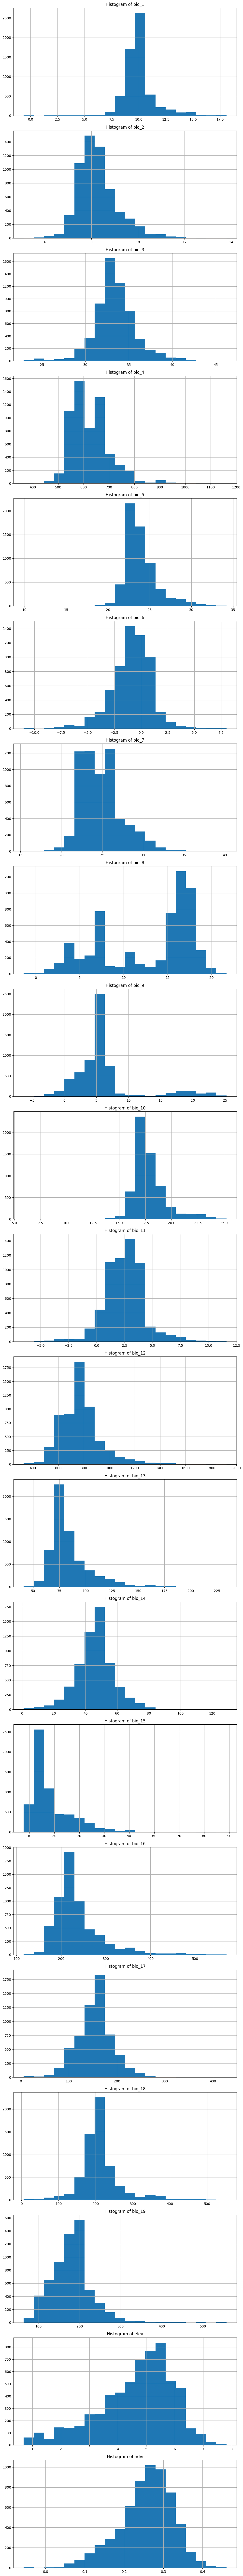

In [399]:
plt.figure(figsize=(10, 5 * len(osmia.columns)))

# Iterate over the columns
for i, column in enumerate(osmia.columns):
    # Create a subplot for each column
    plt.subplot(len(osmia.columns), 1, i + 1)
    # Plot the histogram
    osmia[column].hist(bins=20)
    # Set title
    plt.title(f'Histogram of {column}')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig('figures/histograms/all_data_distributions.png', format='png', dpi=300)

In [400]:
from sklearn.preprocessing import StandardScaler

In [401]:
scaler = StandardScaler()
scaler.fit(osmia)

osmia_scaled = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
america_scaled = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [402]:
osmia_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,...,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03
mean,8.421247e-16,1.066691e-15,6.035227e-16,-1.590680e-16,5.520595e-16,-6.082012e-17,-6.362720e-16,8.421247e-17,1.193010e-16,-1.450326e-16,...,-3.181360e-16,2.853867e-16,-1.309972e-16,-5.614165e-17,-2.011742e-16,-6.549859e-17,1.380149e-16,-1.637465e-16,2.105312e-16,1.309972e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,...,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-7.845699e+00,-3.551678e+00,-4.452453e+00,-3.448098e+00,-7.219863e+00,-5.357000e+00,-3.723612e+00,-2.704484e+00,-2.532916e+00,-7.649436e+00,...,-2.827774e+00,-2.210240e+00,-3.743869e+00,-1.260459e+00,-2.210057e+00,-3.967191e+00,-3.614717e+00,-2.458871e+00,-2.971495e+00,-4.604584e+00
25%,-5.049280e-01,-6.523120e-01,-5.294557e-01,-7.624656e-01,-5.634322e-01,-5.602326e-01,-7.654764e-01,-1.044278e+00,-4.854642e-01,-5.874518e-01,...,-6.740367e-01,-5.802608e-01,-5.197157e-01,-6.469148e-01,-5.880514e-01,-5.705886e-01,-4.288965e-01,-6.031812e-01,-5.853078e-01,-5.672621e-01
50%,-8.089015e-02,-1.521025e-01,-6.613810e-02,-1.199385e-01,-2.538307e-01,7.933638e-02,-1.344073e-01,5.238711e-01,-1.107227e-01,-2.348868e-01,...,-1.524664e-02,-2.746397e-01,-2.369210e-02,-3.653232e-01,-2.378456e-01,4.454401e-02,-1.488243e-01,7.937130e-02,1.836740e-01,1.058235e-01
75%,3.001296e-01,4.314772e-01,5.133876e-01,5.414591e-01,4.169724e-01,6.389592e-01,5.361031e-01,8.000431e-01,3.917387e-02,3.687471e-01,...,3.901626e-01,3.366024e-01,5.550021e-01,3.531744e-01,2.782471e-01,4.992073e-01,2.362749e-01,4.206475e-01,7.104840e-01,6.915692e-01
max,5.957040e+00,6.137579e+00,5.450296e+00,7.102978e+00,5.318995e+00,4.769509e+00,6.057958e+00,1.688873e+00,3.912639e+00,4.754442e+00,...,7.263117e+00,7.620571e+00,6.837967e+00,8.128578e+00,6.158018e+00,7.319156e+00,5.942745e+00,8.056703e+00,2.412253e+00,3.005473e+00


In [403]:

cov_df = osmia_scaled.copy()

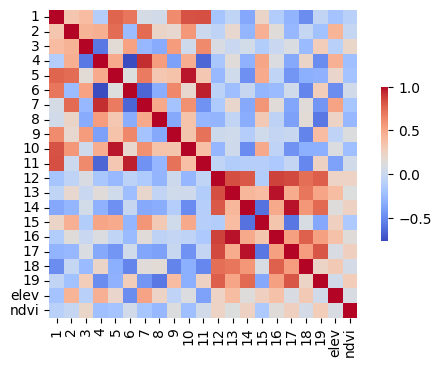

In [404]:
import seaborn as sns

cov_df = cov_df.rename(columns=lambda x: x.replace('bio_', '') if x.startswith('bio_') else x)

cov_reduced = cov_df.cov()

plt.figure(figsize=(6,4))  
sns.heatmap(cov_reduced, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.yticks(rotation=0, ha='right')

plt.savefig('figures/heatmaps/full_cov_heatmap.png', format = 'png', bbox_inches='tight', pad_inches=0, dpi = 300)

In [405]:
america_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,...,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,-1.202259,5.437344,0.550449,4.306116,2.188483,-5.402068,5.670523,0.394734,-0.838578,1.260566,...,-0.185421,0.848083,-1.195932,2.781334,0.721749,-1.171197,0.204314,-0.517066,1.115392,-0.318128
std,5.062953,2.690666,3.839972,3.324110,2.759066,5.201602,2.621923,1.521736,2.605111,3.305851,...,2.609948,2.642218,2.113707,2.565775,2.700973,2.246411,1.831165,3.197774,0.884485,1.461387
min,-11.517621,-3.023679,-6.402156,-5.624151,-8.458269,-15.536806,-4.157472,-4.818629,-5.551289,-10.886623,...,-4.525425,-3.789282,-3.826540,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-2.971495,-6.643942
25%,-5.375218,3.543896,-2.799177,1.951838,-0.099030,-9.354306,3.849216,-0.295122,-3.037113,-1.324633,...,-2.270336,-0.631198,-2.917163,0.515899,-0.864530,-3.004374,-1.094068,-2.672168,0.692906,-1.333751
50%,-1.718659,4.868527,0.293119,3.955358,2.377782,-5.197108,5.663539,0.587359,-1.538147,1.089902,...,-0.503005,0.693160,-2.007786,2.523566,0.610021,-1.988068,0.446329,-1.520361,1.146995,-0.204872
75%,2.627728,7.378841,3.109578,7.135103,4.390191,-1.412991,7.872281,1.400003,1.715291,3.942474,...,1.486035,1.711897,0.306990,4.609545,1.715934,0.445717,1.479095,0.633945,1.812088,0.698059
max,11.011694,14.261364,15.563475,10.924582,10.891822,9.779466,10.554325,3.888726,4.703003,10.876252,...,21.908527,25.091909,8.822062,12.153050,25.972292,9.806432,8.515908,25.696419,2.759650,4.095631


In [406]:
# combined = pd.concat([europe, america, osmia], ignore_index=True)
# combined_points = pd.concat([europe_points, america_points, osmia_coords], ignore_index=True)
# combined.describe()
# combined_vars = combined.drop(columns=['group'])
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(combined_vars)
# combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
# bio_columns = [col for col in combined_scaled.columns if col.startswith('bio_')]


# other_columns = [col for col in combined_scaled.columns if not col.startswith('bio_')]
# bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
# other_columns_sorted = sorted(other_columns)
# sorted_columns = bio_columns_sorted + other_columns_sorted
# combined_scaled = combined_scaled[sorted_columns]

In [407]:
combined_scaled = pd.concat([osmia_scaled, america_scaled])

combined_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,-0.623058,2.817846,0.285264,2.231600,1.134159,-2.799565,2.938689,0.204567,-0.434584,0.653275,...,-0.096092,0.439510,-0.619779,1.441397,0.374039,-0.606960,0.105884,-0.267964,0.578040,-0.164867
std,3.758459,3.408128,2.863307,3.292055,2.371170,4.667874,3.474595,1.311752,2.043088,2.557694,...,2.005064,2.068602,1.775982,2.413453,2.095776,1.854542,1.493264,2.418172,1.094454,1.270341
min,-11.517621,-3.551678,-6.402156,-5.624151,-8.458269,-15.536806,-4.157472,-4.818629,-5.551289,-10.886623,...,-4.525425,-3.789282,-3.826540,-1.481467,-3.905790,-4.127660,-3.684735,-3.461370,-2.971495,-6.643942
25%,-2.059733,-0.133576,-1.105514,-0.382966,-0.511832,-5.463595,-0.173848,-0.637956,-1.688044,-0.704973,...,-1.269482,-0.580261,-2.173128,-0.434568,-0.661779,-2.175282,-0.621446,-1.818978,-0.007111,-0.930275
50%,-0.240673,2.089581,-0.024017,0.987444,0.262172,-0.720125,1.995450,0.546092,-0.226552,0.005498,...,-0.091261,-0.019956,-0.354374,0.503514,-0.071959,-0.383374,-0.061302,-0.347224,0.716254,-0.018510
75%,0.575908,4.998211,1.387919,4.177937,2.738983,0.399121,5.781865,0.952414,0.260612,1.859136,...,0.782903,1.202529,0.472331,2.886110,1.162977,0.499207,0.971464,0.484637,1.290199,0.693947
max,11.011694,14.261364,15.563475,10.924582,10.891822,9.779466,10.554325,3.888726,4.703003,10.876252,...,21.908527,25.091909,8.822062,12.153050,25.972292,9.806432,8.515908,25.696419,2.759650,4.095631


In [408]:
# no_osmia_ind = combined[combined['group'] != 'osmia'].index
# combined_filtered = combined_scaled.loc[no_osmia_ind]
# combined_clipped = combined.loc[no_osmia_ind]



# yes_osmia_ind = combined[combined['group'] == 'osmia'].index
# osmia_scaled = combined_scaled.loc[yes_osmia_ind]

In [409]:
# america_index = combined[combined['group'] == 'america'].index
# america_df = combined_scaled.loc[america_index]

In [410]:
# osmia_scaled.describe()

In [411]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=None) 
pca_result = pca.fit_transform(osmia_scaled) 
pca.explained_variance_

array([6.45486196e+00, 5.56832842e+00, 3.90010713e+00, 1.32838042e+00,
       1.08071008e+00, 7.80822717e-01, 7.50713289e-01, 5.78789323e-01,
       2.88871586e-01, 1.16229888e-01, 4.93186924e-02, 3.66402551e-02,
       2.30426895e-02, 1.55717519e-02, 1.21840293e-02, 7.88775949e-03,
       6.89231925e-03, 2.55491166e-03, 1.30185108e-03, 2.48287373e-04,
       3.55519725e-14])

In [412]:
pca.explained_variance_ratio_

array([3.07323782e-01, 2.65114849e-01, 1.85688816e-01, 6.32457979e-02,
       5.14539138e-02, 3.71759137e-02, 3.57423674e-02, 2.75568595e-02,
       1.37535255e-02, 5.53384552e-03, 2.34812257e-03, 1.74448685e-03,
       1.09709031e-03, 7.41389938e-04, 5.80096365e-04, 3.75545766e-04,
       3.28151653e-04, 1.21642433e-04, 6.19827041e-05, 1.18212620e-05,
       1.69267240e-15])

Explained Variance Ratio: [0.30732378 0.26511485 0.18568882 0.0632458 ]
Total explained variance: 0.8213732448859067


Text(0.5, 1.0, 'PCA Loadings Heatmap')

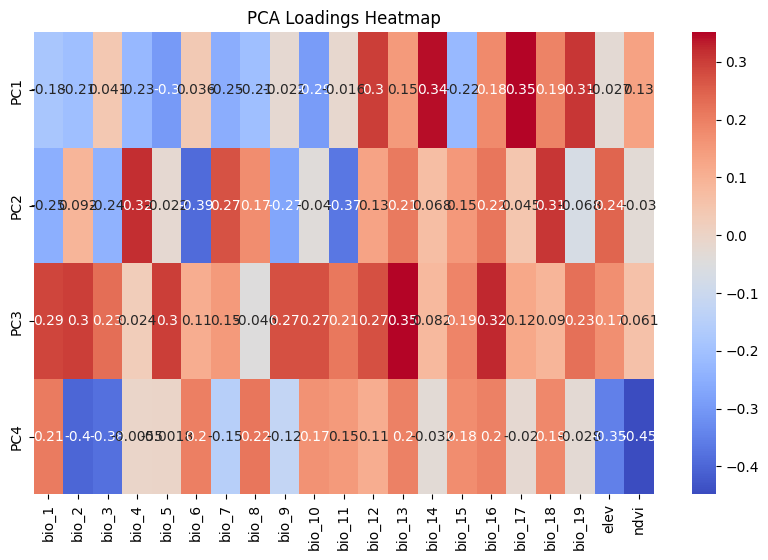

In [413]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=4) 
pca_result = pca.fit_transform(osmia_scaled) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
# plt.savefig('figures/pca_plots/loadings_heatmap.png', format='png', dpi=300)

In [414]:
n_components = pca_result.shape[1]

for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = pca_result[:, i]


In [415]:
america_pca = pca.transform(america_scaled)
for i in range(n_components):
    america_scaled[f'PC{i+1}'] = america_pca[:, i]

In [416]:
america_scaled

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_16,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4
0,8.839268,10.667260,11.813945,-2.365515,6.609001,4.503022,1.719358,2.914187,3.176782,6.613421,...,-2.947332,-4.100915,-2.389401,-2.949455,-0.707201,-1.786712,-16.197735,-11.313777,12.075866,-2.888944
1,9.367779,10.278208,11.045915,-1.853684,7.176604,4.929401,1.837683,3.063384,3.606032,7.115559,...,-1.030417,-4.100915,-0.568933,-2.864136,1.015985,-1.650214,-16.199119,-8.931763,15.158009,-1.060303
2,11.011694,8.620103,11.223847,-2.338929,6.609001,5.782160,0.772755,3.244324,3.514050,7.767271,...,4.443853,-3.940446,2.389329,-2.650839,-0.766127,0.635750,-12.075461,-7.677217,19.949609,3.102950
3,10.704421,8.249577,11.265368,-3.395443,6.609001,6.101944,0.536104,2.882444,3.725268,6.912567,...,7.448249,-3.699742,5.977754,-1.882967,0.955646,1.942619,-8.327275,-5.470780,22.920667,3.731517
4,3.443541,6.239474,12.632592,-4.583236,0.674974,2.211233,-1.120453,0.831787,1.762985,-0.181468,...,9.918122,-2.629946,8.515908,0.313999,2.333294,2.210141,2.153091,0.920067,17.613278,0.464792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,-10.783237,2.163686,-4.900193,8.868985,-3.246645,-15.057129,8.661119,-0.583991,-5.316223,-4.593872,...,1.015522,-0.463609,0.988969,-0.752490,1.210863,-0.941194,-1.157122,22.933030,-9.210087,-6.875488
6531,-10.706418,1.283687,-5.295807,8.334184,-3.762647,-14.684047,7.990607,-0.507806,-5.503594,-4.903702,...,0.886499,-0.142670,1.251536,-0.645841,1.150239,-5.061609,-0.639939,22.544975,-10.062664,-4.316745
6532,-10.635746,2.386002,-4.657737,8.647735,-3.091844,-14.737344,8.542792,-0.564945,-5.231055,-4.529769,...,1.236705,0.151524,1.251536,-0.368554,1.203357,-1.491209,-0.383631,22.753153,-8.468701,-6.564606
6533,-10.672618,1.089160,-5.013592,7.511656,-4.433450,-14.204370,7.122887,-0.628433,-5.346884,-5.309686,...,0.997091,0.499207,1.356563,-0.133926,1.150239,-4.997980,1.130801,21.660805,-9.972087,-4.234478


In [417]:
# combined_filtered['group'] = combined_clipped['group']
america_scaled['group'] = 'america'
osmia_scaled['group'] = 'osmia'

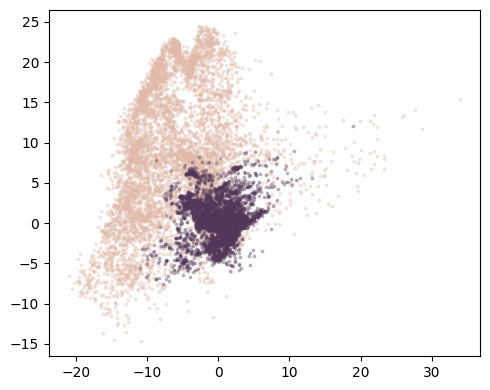

In [418]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(5, 4))

# unique_labels = combined['group'].unique()  
# for i, label in enumerate(unique_labels):
#     subset = combined_filtered[combined_filtered['group'] == label]  
#     plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)

plt.scatter(america_scaled['PC1'], america_scaled['PC2'], c='#E1BAAA', label='america', s=3, marker= 'o', alpha=0.3)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c='#523759', label='osmia', s=3, marker= 'o', alpha=0.3)
# plt.legend()
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.tight_layout()

plt.savefig('figures/pca_plots/pca_osmia_mahal.svg', format='svg')

In [419]:
osmia_scaled[osmia_scaled['PC1']>20]

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_17,bio_18,bio_19,elev,ndvi,PC1,PC2,PC3,PC4,group


In [420]:
america_scaled[america_scaled['PC1']>30]
america_points.iloc[6081]

lat     52.828283
lon   -128.646465
Name: 6081, dtype: float64

In [421]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [422]:
# america_points.iloc[mahal_distances.idxmax()]

In [423]:
osmia

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
0,9.683333,8.050000,29.925650,710.95750,24.6,-2.3,26.900000,18.533333,2.116667,18.533333,...,663.0,82.0,36.0,25.539827,230.0,125.0,230.0,132.0,5.298317,0.157664
10,10.008333,8.183333,30.308643,709.33014,24.9,-2.1,27.000000,18.816666,2.483333,18.816666,...,645.0,81.0,35.0,27.204247,227.0,120.0,227.0,125.0,4.770685,0.151344
45,9.391666,7.666666,31.550068,634.90454,23.0,-1.3,24.300000,17.350000,4.933333,17.350000,...,616.0,71.0,35.0,17.194235,189.0,129.0,189.0,136.0,4.382027,0.178543
46,10.066667,8.233334,30.381304,711.54870,25.1,-2.0,27.100000,18.900000,2.500000,18.900000,...,630.0,79.0,33.0,27.033867,220.0,113.0,220.0,121.0,4.672829,0.213319
54,9.758333,8.266666,33.741497,611.29083,23.5,-1.0,24.500000,16.016666,5.600000,17.450000,...,696.0,74.0,43.0,13.882888,204.0,147.0,200.0,157.0,4.744932,0.289286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21163,10.029167,8.541667,33.107235,663.19977,24.7,-1.1,25.800001,16.816668,3.233333,18.383333,...,564.0,64.0,35.0,19.824036,182.0,109.0,165.0,117.0,5.303305,0.241975
21164,10.333333,8.766666,33.460560,669.74330,25.2,-1.0,26.200000,17.200000,3.466667,18.733334,...,600.0,67.0,38.0,20.291124,196.0,117.0,175.0,129.0,4.584967,0.259833
21165,10.687500,8.425000,32.403847,674.28120,25.3,-0.7,26.000000,17.500000,3.800000,19.133333,...,624.0,76.0,37.0,24.495295,215.0,116.0,192.0,123.0,4.532599,0.220172
21166,9.800000,7.683333,30.981182,648.14070,23.7,-1.1,24.800001,16.333334,3.066667,17.916666,...,606.0,64.0,41.0,16.734297,184.0,125.0,165.0,143.0,5.062595,0.302638


In [424]:
# america.iloc[mahal_distances.idxmax()]

In [425]:
osmia.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,...,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,10.009688,8.278501,33.389905,624.651607,23.891918,-0.948856,24.840774,12.832826,6.091684,17.816422,...,774.406914,84.391770,46.286584,18.623511,235.904033,154.334486,212.502058,179.278848,4.624528,0.256794
std,1.356123,0.899696,2.355533,75.678414,1.938135,1.876418,2.535589,5.250783,4.892664,1.560124,...,157.878150,19.633771,12.097195,8.645285,54.258283,37.393388,57.132840,46.886702,1.323140,0.067896
min,-0.629167,5.083334,22.902868,363.726500,9.900000,-11.000000,15.400001,-1.366667,-6.300000,5.883333,...,328.000000,41.000000,1.000000,7.727378,116.000000,6.000000,6.000000,64.000000,0.693147,-0.055812
25%,9.325000,7.691667,32.142857,566.954170,22.800000,-2.000000,22.900000,7.350000,3.716667,16.900000,...,668.000000,73.000000,40.000000,13.031209,204.000000,133.000000,188.000000,151.000000,3.850148,0.218283
50%,9.900000,8.141666,33.234127,615.575600,23.400000,-0.800000,24.500000,15.583333,5.550000,17.450000,...,772.000000,79.000000,46.000000,15.465448,223.000000,156.000000,204.000000,183.000000,4.867534,0.263979
75%,10.416667,8.666667,34.599107,665.625000,24.700000,0.250000,26.199999,17.033333,6.283333,18.391666,...,836.000000,91.000000,53.000000,21.676554,251.000000,173.000000,226.000000,199.000000,5.564520,0.303745
max,18.087500,13.800000,46.227200,1162.149500,34.200000,8.000000,40.200000,21.700000,25.233334,25.233334,...,1921.000000,234.000000,129.000000,88.891600,570.000000,428.000000,552.000000,557.000000,7.816014,0.460837


In [426]:
# mahal_distances_eur.idxmin()

In [427]:
osmia_coords.iloc[3729]

lat    51.697052
lon     7.766022
Name: 12690, dtype: float64

In [428]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [429]:
osmia_pca_df = osmia_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
# europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [430]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_mean = osmia_pca_df.mean()
osmia_cov = osmia_pca_df.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

In [431]:
mahal_distances

0       10.358910
1       10.711629
2       11.936008
3       12.700516
4        8.976424
          ...    
6530    12.328528
6531    11.460093
6532    11.992753
6533    11.110999
6534    11.289962
Length: 6535, dtype: float64

In [432]:
mahal_distances_eur = osmia_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

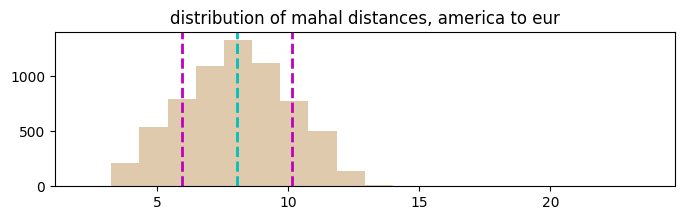

In [433]:
mean = np.mean(mahal_distances)
std_dev = np.std(mahal_distances)

plt.figure(figsize=(8, 2))

# Create histogram
plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

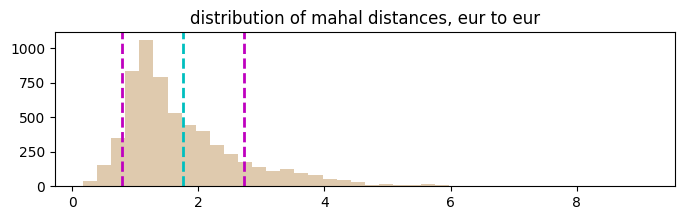

In [434]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.figure(figsize=(8, 2))

plt.hist(mahal_distances_eur, bins=40, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [435]:
max(mahal_distances_eur)

9.109696739782319

In [436]:
# import matplotlib.colors as mcolors
# import matplotlib.cm as cm

# fig, axs = plt.subplots(2, 1, figsize=(8, 2), sharex=True)
# plt.gca().set_facecolor('#e1e1e1')

# bins = np.linspace(0,16,50)

# n, bins, patches = axs[1].hist(mahal_distances, bins=bins)
# cmap = cm.Spectral
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)
# axs[1].set_facecolor('#e1e1e1')
# axs[0].set_facecolor('#e1e1e1')


# axs[0].hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

# x_min = min(mahal_distances_eur)
# x_max = max(mahal_distances)
# axs[0].set_xlim(x_min, 16)
# axs[1].set_xlim(x_min, 16)

# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# plt.subplots_adjust(hspace=0)
# plt.savefig('figures/histograms/colormap_hist.svg', format='svg')

# plt.figure(figsize=(10,3))
# n, bins, patches = plt.hist(distance_points['normalized'], bins=80)

# cmap = cm.coolwarm_r
# norm = mcolors.Normalize(vmin=0, vmax=0.4)
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)
# plt.gca().set_facecolor('#e1e1e1')
# plt.ylabel('Counts')
# plt.xlabel('Normalized minimum distance to native range point')
# plt.tight_layout()


In [437]:
print('Euro range of distances:', mahal_distances_eur.min(), mahal_distances_eur.max())

Euro range of distances: 0.17093781053140447 9.109696739782319


In [438]:
print('Range of mahal distances:', mahal_distances.min(), mahal_distances.max())

Range of mahal distances: 2.163837292915944 23.673863672227412


In [439]:
len(mahal_distances[mahal_distances<mahal_distances_eur.max()])/len(mahal_distances)

0.6916602907421576

In [440]:
america_points['dist'] = mahal_distances


In [441]:
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

In [442]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# colors = ['#DBDBDB', "#ee4949", "#de8c9e", "#dd8cde", "#8c94de", '#DBDBDB']
# cmap_custom = LinearSegmentedColormap.from_list("cmap_custom", colors)
# mpl.colormaps.register(cmap=cmap_custom, force=True)

# colors = ['#DBDBDB', "#ee4949", "#ee8b49", "#cacc5c", "#65c392", "#6597c3", '#DBDBDB']
# cmap_custom2 = LinearSegmentedColormap.from_list("cmap_custom2", colors)
# mpl.colormaps.register(cmap=cmap_custom2, force=True)

colors = ['#DBDBDB', "#c51616", "#d77009", "#ceb812", "#0fa919", "#7c90de", '#DBDBDB']
cmap_custom3 = LinearSegmentedColormap.from_list("cmap_custom3", colors)
mpl.colormaps.register(cmap=cmap_custom3, force=True)

/tmp/ipykernel_76693/1062882266.py:14: UserWarning: Overwriting the cmap 'cmap_custom3' that was already in the registry.
  mpl.colormaps.register(cmap=cmap_custom3, force=True)


In [443]:
def add_scale_bar(ax, length=100, location=(0, 0), linewidth=5, units='km', text=True):
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
    import numpy as np

    extent = ax.get_extent(crs=ccrs.PlateCarree())
    map_width_deg = extent[1] - extent[0]

    mid_lat = (extent[2] + extent[3]) / 2

    km_per_deg_at_lat = np.cos(np.radians(mid_lat)) * 111.32

    map_width_km = map_width_deg * km_per_deg_at_lat

    scale_bar_length_deg = (length / map_width_km) * map_width_deg
    
    x_start = location[0] * map_width_deg + extent[0]
    x_end = x_start + scale_bar_length_deg
    y_position = location[1] * (extent[3] - extent[2]) + extent[2]

    ax.plot([x_start, x_end], [y_position, y_position], transform=ccrs.PlateCarree(), color='k', linewidth=linewidth)
    
    if text==True:
        ax.text(x_end, y_position, ' '+f'{length} {units}', verticalalignment='bottom', horizontalalignment='left', transform=ccrs.Geodetic(), fontsize=10)

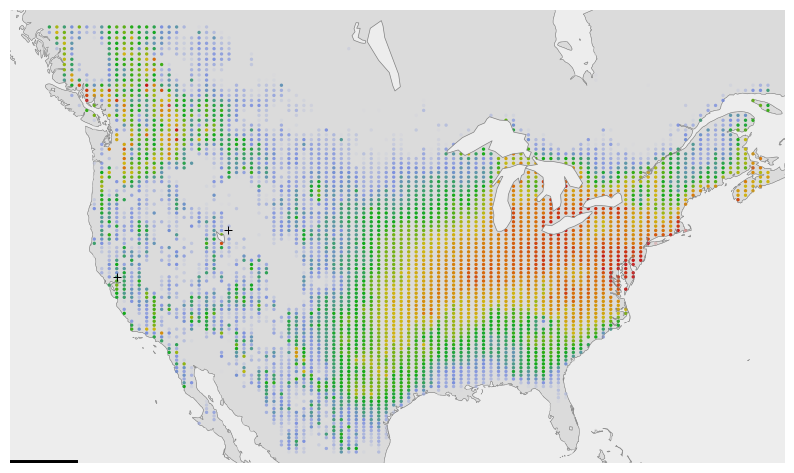

In [444]:
import geopandas as gpd
# from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
# from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

cities = {'logan': [41.73530959506221, -111.837716001538],
          'dixon': [38.44453457025947, -121.82173075314377]}

map_projection = ccrs.Mercator() 
shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)
great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='cmap_custom3', vmin=mahal_distances.min(), vmax =mahal_distances_eur.max(), s=2)

for city in cities.values():
    ax.scatter(city[1], city[0], transform=ccrs.PlateCarree(), s=40, c='k', marker="+", lw=0.7)

ax.axis('off')

add_scale_bar(ax, 500, location=(0, 0), linewidth=5, units='km', text=False)

# plt.savefig('figures/maps/similarity_map.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)

In [445]:
print(min(mahal_distances), max(mahal_distances_eur))

bins_start = np.linspace(0, min(mahal_distances), 10, endpoint=False)
bins_middle = np.linspace(min(mahal_distances), max(mahal_distances_eur)+0.25, 30)  
bins_end = np.linspace(max(mahal_distances_eur)+0.25, 16, 30, endpoint=True)

bins = np.concatenate((bins_start, bins_middle, bins_end)) 

2.163837292915944 9.109696739782319


In [446]:
# import matplotlib.colors as mcolors
# import matplotlib.gridspec as gridspec



# fig = plt.figure(figsize=(10, 1))  

# gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])

# ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1], sharex=ax1)

# fig.subplots_adjust(hspace=0) 

# # bins = np.linspace(0,16,50)

# n, bins, patches = ax1.hist(mahal_distances, bins=bins)
# cmap = cmap_custom3
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)

# n, bins, patches = ax2.hist(mahal_distances, bins=bins)
# cmap = cmap_custom3
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)

# x_min = min(mahal_distances_eur)
# x_max = max(mahal_distances)
# ax1.set_xlim(0, 16)
# ax2.set_xlim(0, 16)


# ax1.set_ylim(10, 450) 
# ax2.set_ylim(0, 10)
# 2.11
# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax1.spines.top.set_visible(False)
# ax2.spines.right.set_visible(False)
# ax1.spines.right.set_visible(False)
# ax1.tick_params(labeltop=False)
# ax2.xaxis.tick_bottom()

# for ax in (ax1, ax2):
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='gray', linestyle='--', ymin=0, ymax=2)



NameError: name 'ax1' is not defined

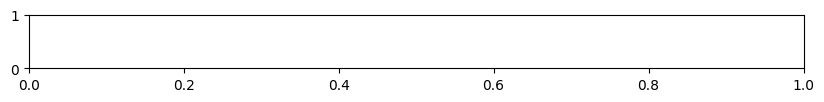

In [447]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(10, 2))  

gs = gridspec.GridSpec(4, 1, height_ratios=[3, 1, 3, .5])

ax3 = fig.add_subplot(gs[0])
ax4 = fig.add_subplot(gs[1], sharex=ax1)
ax1 = fig.add_subplot(gs[2])
ax2 = fig.add_subplot(gs[3], sharex=ax1)

fig.subplots_adjust(hspace=0) 

n, bins, patches = ax1.hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)

n, bins, patches = ax2.hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)

ax3.hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')
ax4.hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

x_min = min(mahal_distances_eur)
x_max = max(mahal_distances)

all_axs = (ax1, ax2, ax3, ax4)

for ax in all_axs:
    ax.set_xlim(0,16)

ax1.set_ylim(10, 450) 
ax2.set_ylim(0, 10)
ax3.set_ylim(20, 1400)
ax4.set_ylim(0,20)


for ax in axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

for ax in axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

ax1.spines.bottom.set_visible(False)
# ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# ax1.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.spines.right.set_visible(False)


ax3.spines.bottom.set_visible(False)
ax4.spines.top.set_visible(False)
ax3.spines.top.set_visible(False)
ax4.spines.right.set_visible(False)
ax3.spines.right.set_visible(False)

ax4.xaxis.tick_bottom()



for ax in all_axs:
    ax.axvline(min(mahal_distances)-.2, color='#d40202', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='gray', linestyle='--', ymin=0, ymax=2)

plt.savefig('figures/histograms/colormap_hist_split_axes.svg', format='svg')

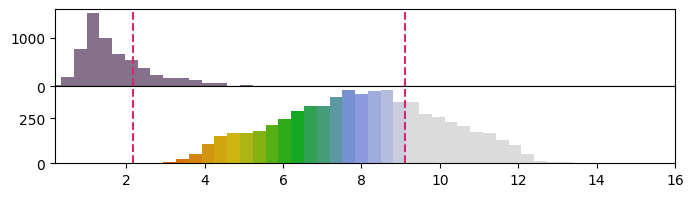

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 1, figsize=(8, 2), sharex=True)
# plt.gca().set_facecolor('#e1e1e1')

bins = np.linspace(0,16,50)

n, bins, patches = axs[1].hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)
# axs[1].set_facecolor('#e1e1e1')
# axs[0].set_facecolor('#e1e1e1')


axs[0].hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

x_min = min(mahal_distances_eur)
x_max = max(mahal_distances)
axs[0].set_xlim(x_min, 16)
axs[1].set_xlim(x_min, 16)

for ax in axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

plt.subplots_adjust(hspace=0)
# plt.savefig('figures/histograms/colormap_hist.svg', format='svg')

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

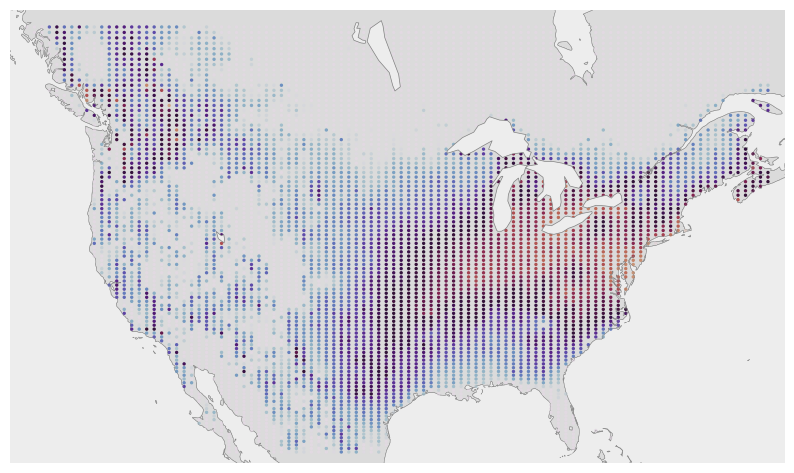

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='twilight_r', vmin=mahal_distances.min(), vmax =mahal_distances_eur.max(), s=2)

ax.axis('off')

(-10.11298075, 46.55047775, 33.71471915, 61.16589785)

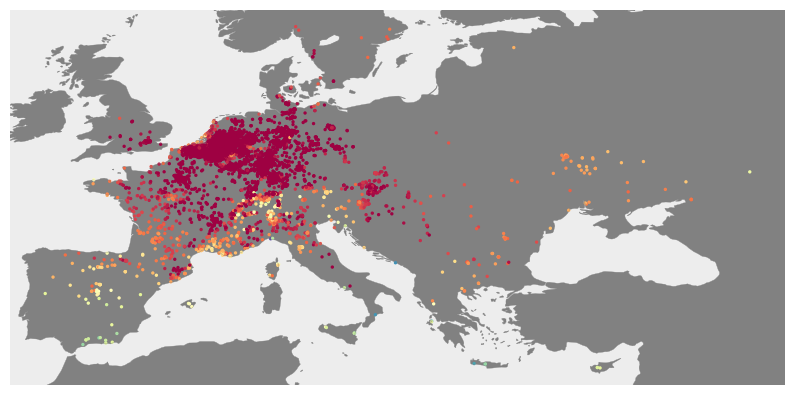

In [ ]:
plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(osmia_coords['lon'], osmia_coords['lat'], transform=ccrs.PlateCarree(), 
           c=mahal_distances_eur, s=2, cmap='Spectral', vmin=2, vmax = 8)
ax.axis('off')

# plt.savefig('eur_mahal.png', format='png', dpi=300)